In [1]:
import pandas as pd

# Load the shelter occupancy dataset from CSV
df = pd.read_csv("C:\\Users\\Olenka\\visualization\\02_activities\\assignments\\data\\daily_shelter_overnight_occupancy.csv")

# Check structure
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42489 entries, 0 to 42488
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     42489 non-null  int64  
 1   OCCUPANCY_DATE          42489 non-null  object 
 2   ORGANIZATION_ID         42489 non-null  int64  
 3   ORGANIZATION_NAME       42489 non-null  object 
 4   SHELTER_ID              42489 non-null  int64  
 5   SHELTER_GROUP           42489 non-null  object 
 6   LOCATION_ID             42489 non-null  int64  
 7   LOCATION_NAME           42489 non-null  object 
 8   LOCATION_ADDRESS        40560 non-null  object 
 9   LOCATION_POSTAL_CODE    40560 non-null  object 
 10  LOCATION_CITY           40549 non-null  object 
 11  LOCATION_PROVINCE       40207 non-null  object 
 12  PROGRAM_ID              42489 non-null  int64  
 13  PROGRAM_NAME            42489 non-null  object 
 14  SECTOR                  42489 non-null

,_id,OCCUPANCY_DATE,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,LOCATION_POSTAL_CODE,...,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,CAPACITY_ACTUAL_ROOM,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS
0,1,2025-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,...,NaN,NaN,NaN,148.0,150.0,148.0,0.0,2.0,NaN,100.0
1,2,2025-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,...,NaN,NaN,NaN,57.0,57.0,57.0,0.0,0.0,NaN,100.0
2,3,2025-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1051,COSTI Reception Centre,100 Lippincott St,M5S 2P1,...,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN
3,4,2025-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1051,COSTI Reception Centre,100 Lippincott St,M5S 2P1,...,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN
4,5,2025-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114,COSTI Uptown Hotel Program,55 Hallcrown Pl,M2J 4R1,...,NaN,NaN,NaN,70.0,83.0,70.0,0.0,13.0,NaN,100.0


In [2]:
cols = [
    'OCCUPANCY_DATE',
    'SECTOR',
    'OCCUPIED_BEDS',
    'UNOCCUPIED_BEDS',
    'CAPACITY_ACTUAL_BED',
    'OCCUPANCY_RATE_BEDS'
]
df = df[cols]
df.head()

,OCCUPANCY_DATE,SECTOR,OCCUPIED_BEDS,UNOCCUPIED_BEDS,CAPACITY_ACTUAL_BED,OCCUPANCY_RATE_BEDS
0,2025-01-01,Families,NaN,NaN,NaN,NaN
1,2025-01-01,Mixed Adult,NaN,NaN,NaN,NaN
2,2025-01-01,Mixed Adult,8.0,0.0,8.0,100.0
3,2025-01-01,Mixed Adult,8.0,0.0,8.0,100.0
4,2025-01-01,Families,NaN,NaN,NaN,NaN


In [3]:
# Remove rows with missing occupancy values
df = df.dropna(subset=['OCCUPIED_BEDS', 'OCCUPANCY_RATE_BEDS'])

In [4]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 31726 entries, 2 to 42488
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OCCUPANCY_DATE       31726 non-null  object 
 1   SECTOR               31726 non-null  object 
 2   OCCUPIED_BEDS        31726 non-null  float64
 3   UNOCCUPIED_BEDS      31726 non-null  float64
 4   CAPACITY_ACTUAL_BED  31726 non-null  float64
 5   OCCUPANCY_RATE_BEDS  31726 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.7+ MB


,OCCUPANCY_DATE,SECTOR,OCCUPIED_BEDS,UNOCCUPIED_BEDS,CAPACITY_ACTUAL_BED,OCCUPANCY_RATE_BEDS
2,2025-01-01,Mixed Adult,8.0,0.0,8.0,100.00
3,2025-01-01,Mixed Adult,8.0,0.0,8.0,100.00
8,2025-01-01,Men,42.0,0.0,42.0,100.00
9,2025-01-01,Men,29.0,0.0,29.0,100.00
12,2025-01-01,Mixed Adult,7.0,0.0,7.0,100.00
13,2025-01-01,Men,16.0,2.0,18.0,88.89
18,2025-01-01,Men,68.0,0.0,68.0,100.00
19,2025-01-01,Men,48.0,0.0,48.0,100.00
20,2025-01-01,Men,101.0,0.0,101.0,100.00
24,2025-01-01,Mixed Adult,93.0,0.0,93.0,100.00


In [5]:
# Convert the date text to datetime format to enable monthly grouping
df['OCCUPANCY_DATE'] = pd.to_datetime(df['OCCUPANCY_DATE'])

In [ ]:
# Create a MONTH column for grouping
df['MONTH'] = df['OCCUPANCY_DATE'].dt.to_period('M')

In [7]:
# Group by month and sector to compute average occupancy rates
monthly = (
    df.groupby(['MONTH', 'SECTOR'], as_index=False)['OCCUPANCY_RATE_BEDS']
      .mean()
)

monthly.head()

,MONTH,SECTOR,OCCUPANCY_RATE_BEDS
0,2025-01,Men,95.651433
1,2025-01,Mixed Adult,94.351844
2,2025-01,Women,98.372629
3,2025-01,Youth,92.949267
4,2025-02,Men,95.386663


In [8]:
# Convert to month start datetime instead of Period
monthly['MONTH'] = monthly['MONTH'].dt.to_timestamp()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

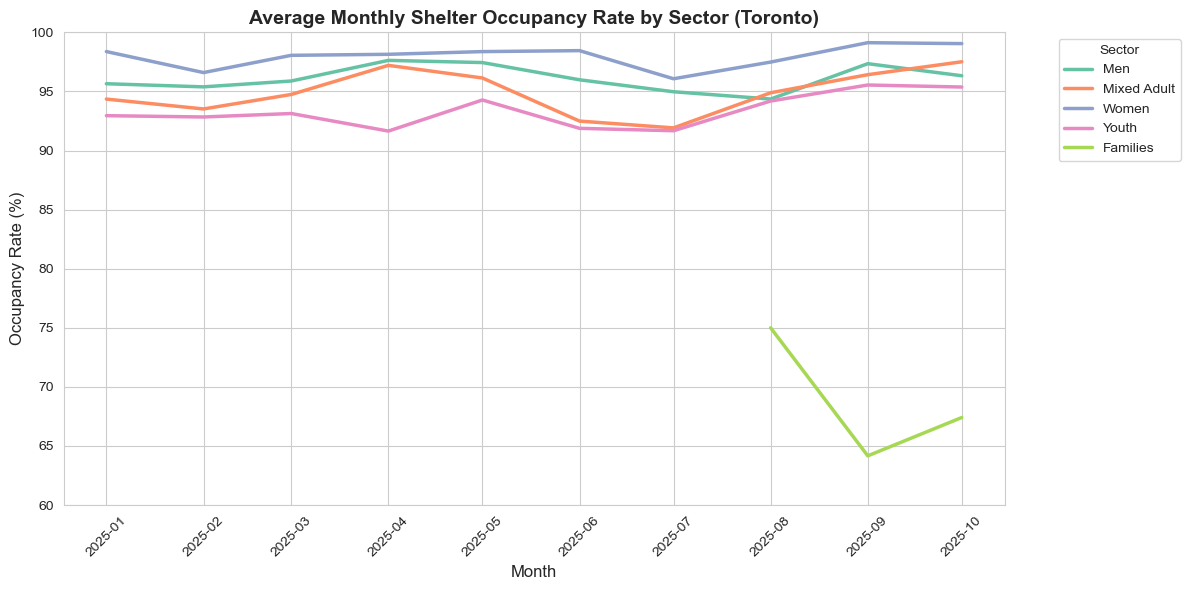

In [10]:
# Visualize monthly occupancy rates by sector using a line chart
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")  # cleaner background
sns.lineplot(
    data=monthly,
    x='MONTH',
    y='OCCUPANCY_RATE_BEDS',
    hue='SECTOR',
    linewidth=2.5,
    palette='Set2'  # colorblind-safe palette
)

plt.title("Average Monthly Shelter Occupancy Rate by Sector (Toronto)", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Occupancy Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(60, 100)  # focus on meaningful range
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("viz1_shelter_occupancy_trends.png", dpi=300)
plt.show()

In [11]:
df.to_csv("cleaned_shelter_data.csv", index=False)